## PEQUEÑO ANÁLISIS DE DATOS

In [2]:
from AnalisisDatos import AnalisisDatos as ad
from Grafico import Grafico as graf

In [3]:
an = ad(r"C:\Users\andre\OneDrive\Escritorio\UCR-TEC\2025\Primer Semestre 2025\Herramientas de Ciencia de Datos II\Proyecto Individual\TablasDatos\Guardia\basemodelo_guardia.xlsx")
grafico = graf(r"C:\Users\andre\OneDrive\Escritorio\UCR-TEC\2025\Primer Semestre 2025\Herramientas de Ciencia de Datos II\Proyecto Individual\TablasDatos\Guardia\basemodelo_guardia.xlsx")

In [4]:
an.est_basicas()

     temperatura  precipitacion   caudal    viento    niño  humedad
min    29.102012       0.122816   2.5500 -2.235712  24.580   0.0135
q1     31.395956       0.723065   5.9375 -1.403222  26.330   0.0145
q2     32.723570       3.617407   8.9050 -0.759997  26.955   0.0148
q3     33.372307       7.558890  12.3000 -0.329110  27.595   0.0150
max    37.267394      14.890127  63.3000  0.770002  29.020   0.0159


{'temperatura': {'min': 29.10201238816784,
  'q1': 31.395955808701054,
  'q2': 32.72357042835605,
  'q3': 33.37230664683926,
  'max': 37.26739436182483},
 'precipitacion': {'min': 0.1228157589832942,
  'q1': 0.7230648651719094,
  'q2': 3.617407104661387,
  'q3': 7.558889566698382,
  'max': 14.8901274840037},
 'caudal': {'min': 2.55,
  'q1': 5.9375,
  'q2': 8.905000000000001,
  'q3': 12.3,
  'max': 63.3},
 'viento': {'min': -2.235711782142857,
  'q1': -1.4032222370564513,
  'q2': -0.7599967923333333,
  'q3': -0.32911027349193556,
  'max': 0.7700022331666667},
 'niño': {'min': 24.58, 'q1': 26.33, 'q2': 26.955, 'q3': 27.595, 'max': 29.02},
 'humedad': {'min': 0.013500005,
  'q1': 0.014500022,
  'q2': 0.014800012,
  'q3': 0.0150000155,
  'max': 0.015900016}}

'Gráfico guardado como serie_tiempo_caudal_guardia.png'

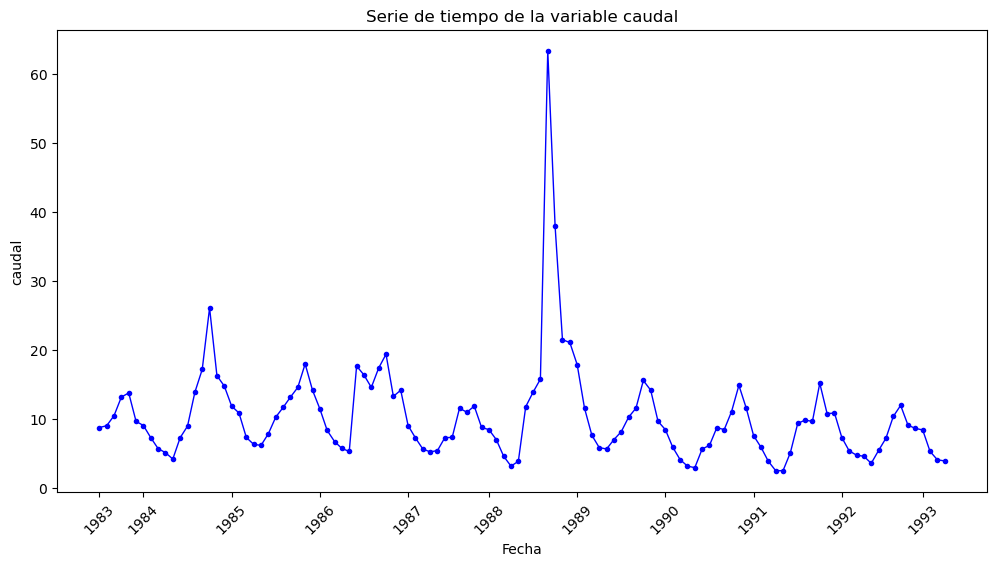

In [5]:
grafico.linea('datetime', 'caudal')
grafico.guardar_en_png('serie_tiempo_caudal_guardia')

'Gráfico guardado como descomposicion_serie_guardia.png'

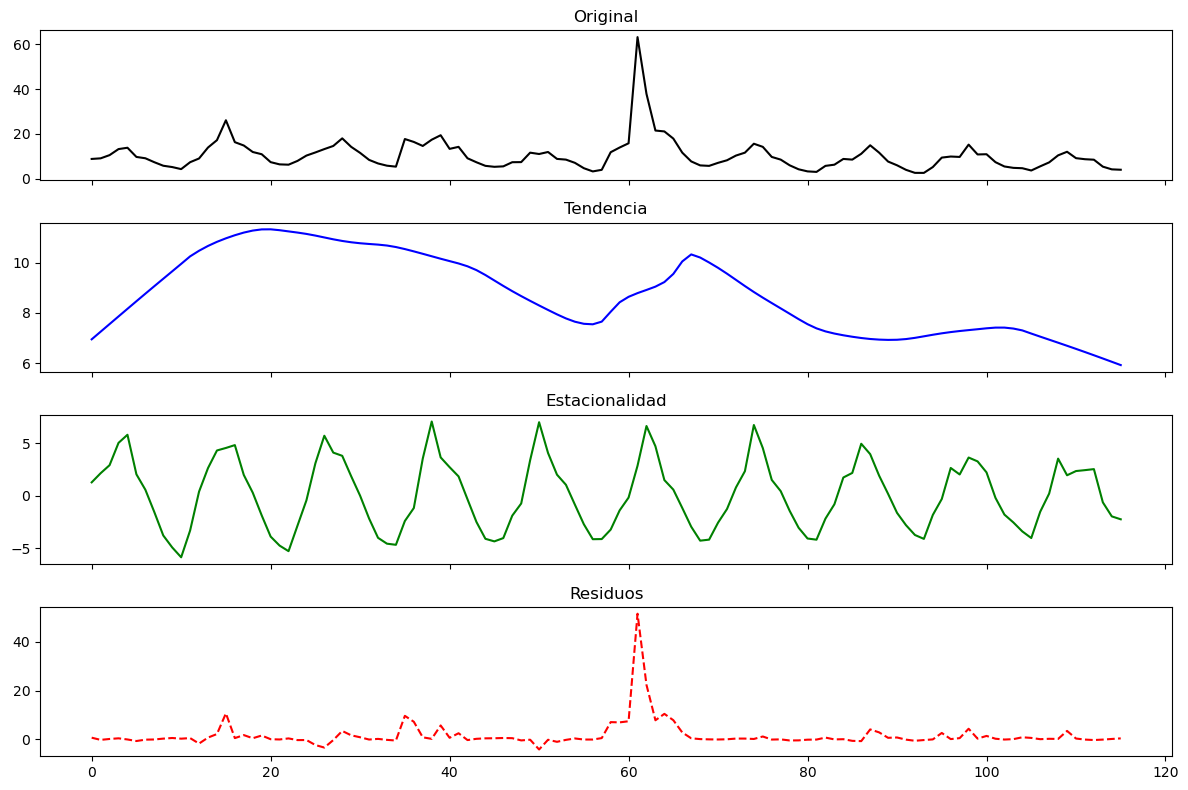

In [6]:
grafico.descomposicion('STL', 'caudal')
grafico.guardar_en_png('descomposicion_serie_guardia')

'Gráfico guardado como distribucion_caudal_guardia.png'

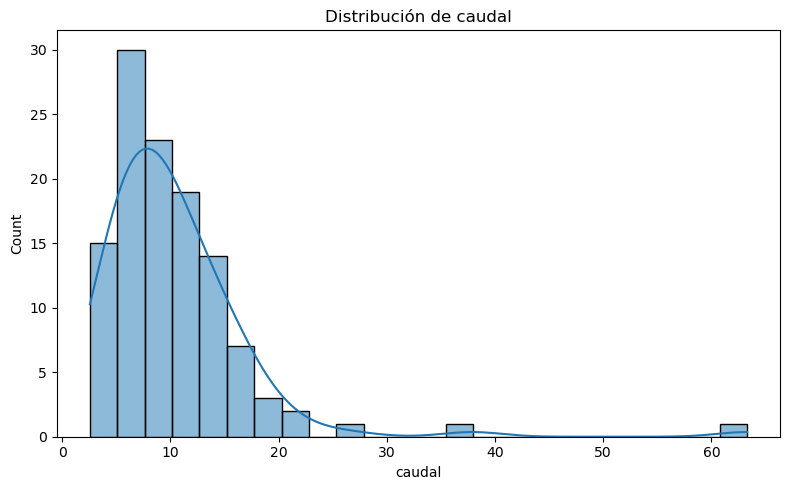

In [7]:
grafico.dist('caudal')
grafico.guardar_en_png('distribucion_caudal_guardia')

'Gráfico guardado como distribucion_precipitacion_guardia.png'

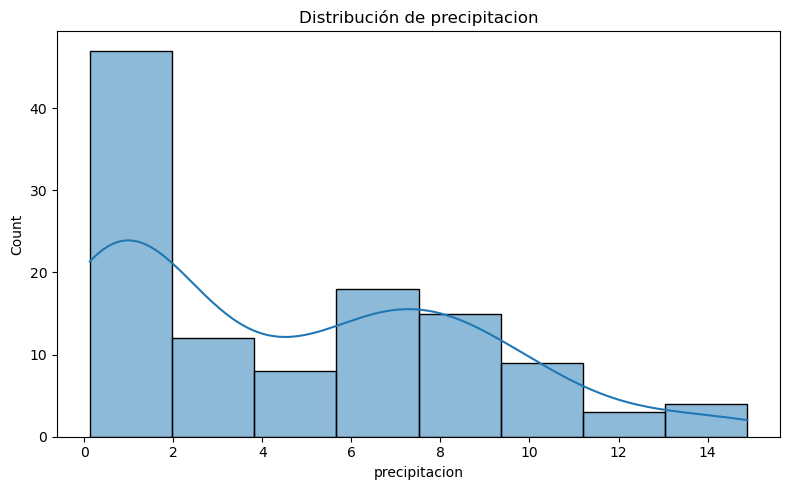

In [8]:
grafico.dist('precipitacion')
grafico.guardar_en_png('distribucion_precipitacion_guardia')

'Gráfico guardado como dist_temp_guardia.png'

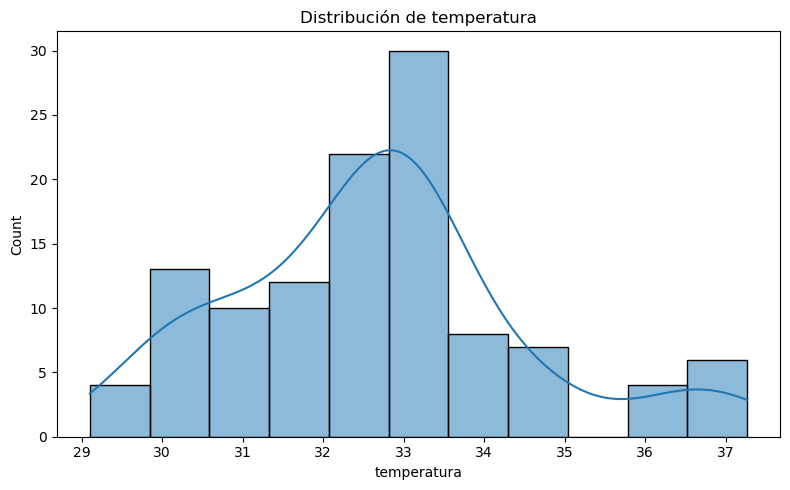

In [9]:
grafico.dist('temperatura')
grafico.guardar_en_png('dist_temp_guardia')

## MODELO 

In [11]:
from Modelo import Modelo

In [12]:
modelo = Modelo(r"C:\Users\andre\OneDrive\Escritorio\UCR-TEC\2025\Primer Semestre 2025\Herramientas de Ciencia de Datos II\Proyecto Individual\TablasDatos\Guardia\basemodelo_guardia.xlsx")

In [13]:
modelo.fechas('datetime')

In [14]:
modelo.datos

,temperatura,precipitacion,caudal,viento,niño,humedad,ano,mes
0,33.586399,5.611070,8.79,-0.774190,27.18,0.0150,1983,7
1,32.744043,5.684166,9.06,-0.612899,26.59,0.0150,1983,8
2,32.169130,9.694898,10.50,-0.269997,26.20,0.0150,1983,9
3,31.440404,9.860561,13.20,-0.654835,25.56,0.0150,1983,10
4,31.184763,4.658684,13.80,-0.446662,25.41,0.0150,1983,11
...,...,...,...,...,...,...,...,...
111,30.115267,2.298154,8.67,-1.754835,26.44,0.0150,1992,12
112,34.524014,1.526451,8.45,-1.522579,26.69,0.0142,1993,1
113,36.849879,0.256011,5.34,-1.646426,27.16,0.0142,1993,2
114,32.673515,0.338130,4.13,-0.987095,27.67,0.0142,1993,3


In [15]:
modelo.lag(1, 'caudal')
modelo.lag(2, 'caudal')
modelo.lag(3, 'caudal')
modelo.lag(4, 'caudal')
modelo.lag(5, 'caudal')
modelo.lag(6, 'caudal')
modelo.lag(12, 'caudal')
modelo.lag(1, 'niño')
modelo.lag(2, 'niño')
modelo.lag(3, 'niño')
modelo.lag(4, 'niño')
modelo.lag(5, 'niño')
modelo.lag(6, 'niño')
modelo.lag(1, 'temperatura') 
modelo.lag(2, 'temperatura')   
modelo.lag(3, 'temperatura')   
modelo.lag(4, 'temperatura')   
modelo.lag(5, 'temperatura')   
modelo.lag(6, 'temperatura')   
modelo.lag(1, 'precipitacion')    
modelo.lag(2, 'precipitacion')    
modelo.lag(3, 'precipitacion')    
modelo.lag(4, 'precipitacion')    
modelo.lag(5, 'precipitacion')    
modelo.lag(6, 'precipitacion')    

,temperatura,precipitacion,caudal,viento,niño,humedad,ano,mes,caudal_lag_1,caudal_lag_2,...,temperatura_lag_3,temperatura_lag_4,temperatura_lag_5,temperatura_lag_6,precipitacion_lag_1,precipitacion_lag_2,precipitacion_lag_3,precipitacion_lag_4,precipitacion_lag_5,precipitacion_lag_6
0,33.586399,5.611070,8.79,-0.774190,27.18,0.0150,1983,7,8.79,8.79,...,33.586399,33.586399,33.586399,33.586399,5.611070,5.611070,5.611070,5.611070,5.611070,5.611070
1,32.744043,5.684166,9.06,-0.612899,26.59,0.0150,1983,8,8.79,8.79,...,33.586399,33.586399,33.586399,33.586399,5.611070,5.611070,5.611070,5.611070,5.611070,5.611070
2,32.169130,9.694898,10.50,-0.269997,26.20,0.0150,1983,9,9.06,8.79,...,33.586399,33.586399,33.586399,33.586399,5.684166,5.611070,5.611070,5.611070,5.611070,5.611070
3,31.440404,9.860561,13.20,-0.654835,25.56,0.0150,1983,10,10.50,9.06,...,33.586399,33.586399,33.586399,33.586399,9.694898,5.684166,5.611070,5.611070,5.611070,5.611070
4,31.184763,4.658684,13.80,-0.446662,25.41,0.0150,1983,11,13.20,10.50,...,32.744043,33.586399,33.586399,33.586399,9.860561,9.694898,5.684166,5.611070,5.611070,5.611070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,30.115267,2.298154,8.67,-1.754835,26.44,0.0150,1992,12,9.14,12.00,...,32.198332,32.928042,33.103178,34.052756,3.928999,12.704003,10.243837,10.984297,7.006191,2.844483
112,34.524014,1.526451,8.45,-1.522579,26.69,0.0142,1993,1,8.67,9.14,...,32.214896,32.198332,32.928042,33.103178,2.298154,3.928999,12.704003,10.243837,10.984297,7.006191
113,36.849879,0.256011,5.34,-1.646426,27.16,0.0142,1993,2,8.45,8.67,...,30.373192,32.214896,32.198332,32.928042,1.526451,2.298154,3.928999,12.704003,10.243837,10.984297
114,32.673515,0.338130,4.13,-0.987095,27.67,0.0142,1993,3,5.34,8.45,...,30.115267,30.373192,32.214896,32.198332,0.256011,1.526451,2.298154,3.928999,12.704003,10.243837


In [16]:
modelo.descargar_excel('base_para_modelo_guardia_rf')

'Archivo base_para_modelo_guardia_rf.xlsx descargado con éxito'

'Gráfico guardado como heatmap_guardia.png'

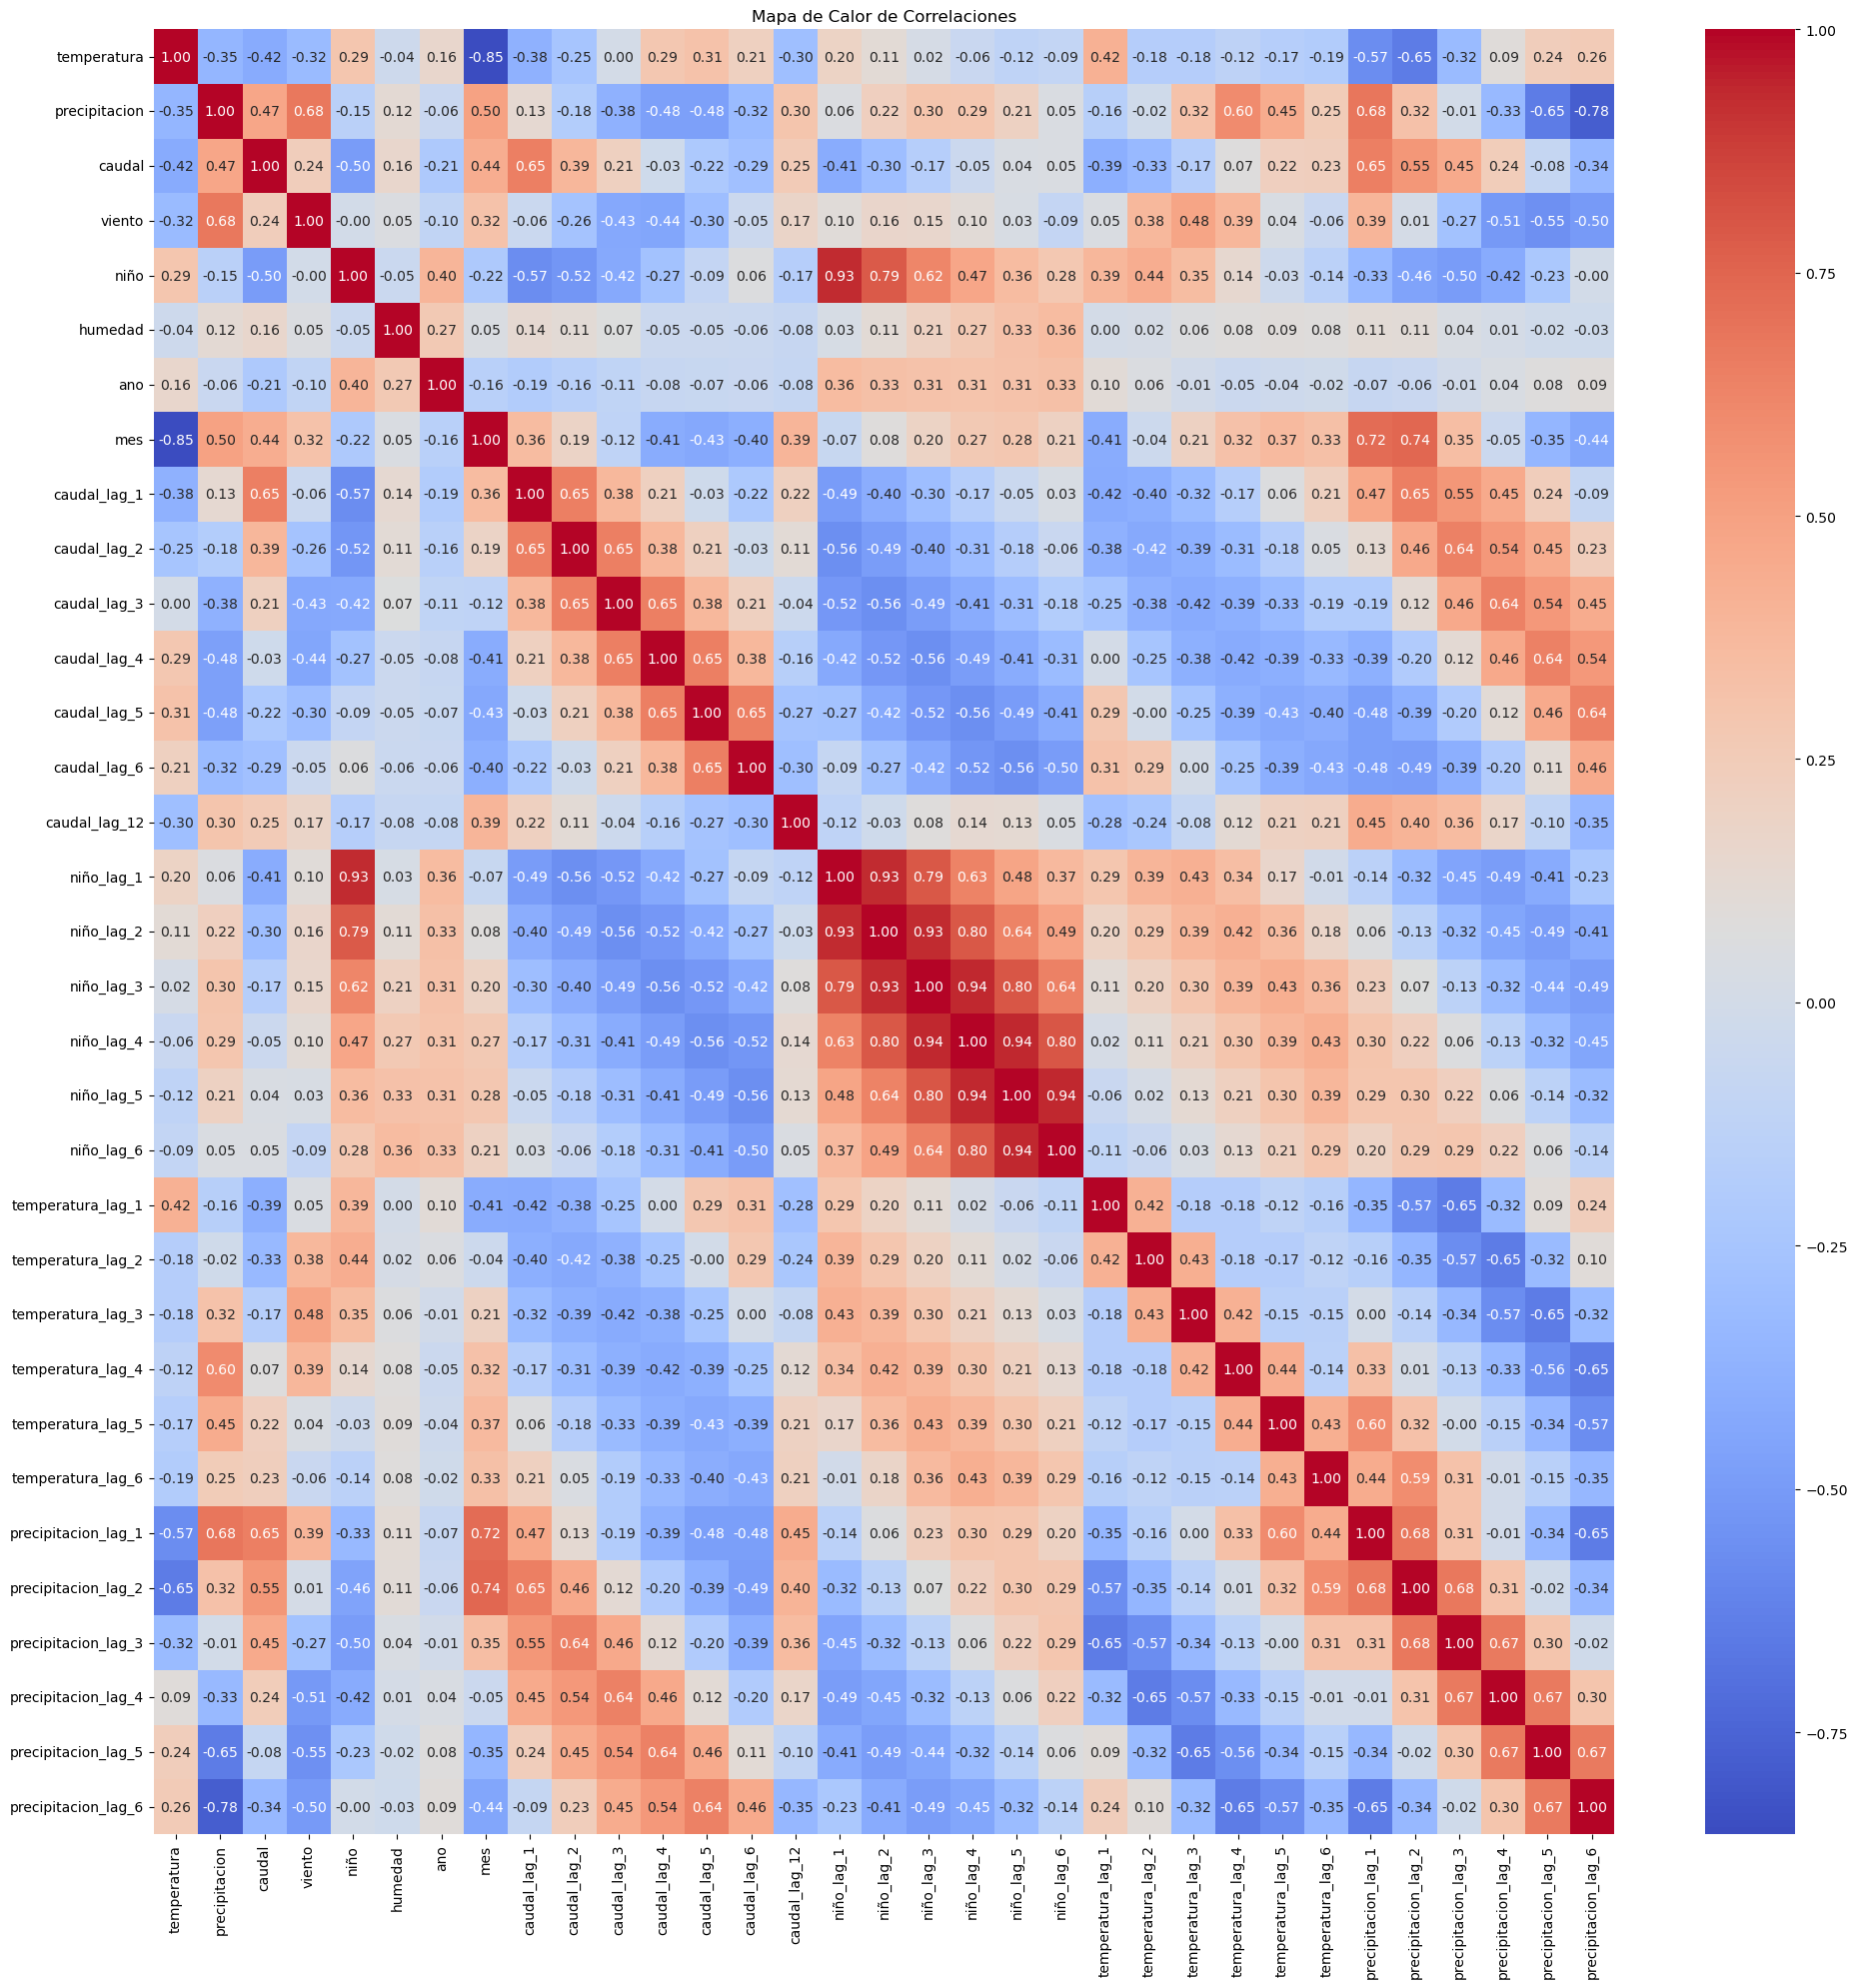

In [17]:
modelo.heatmap()
modelo.guardar_en_png('heatmap_guardia')

In [18]:
modelo.top_corr(95)

Correlaciones >= 0.65 (percentil 95):
niño_lag_4 vs niño_lag_5 -> 0.94
niño_lag_5 vs niño_lag_6 -> 0.94
niño_lag_3 vs niño_lag_4 -> 0.94
niño_lag_2 vs niño_lag_3 -> 0.93
niño_lag_1 vs niño_lag_2 -> 0.93
niño vs niño_lag_1 -> 0.93
niño_lag_4 vs niño_lag_6 -> 0.80
niño_lag_3 vs niño_lag_5 -> 0.80
niño_lag_2 vs niño_lag_4 -> 0.80
niño_lag_1 vs niño_lag_3 -> 0.79
niño vs niño_lag_2 -> 0.79
mes vs precipitacion_lag_2 -> 0.74
mes vs precipitacion_lag_1 -> 0.72
precipitacion vs precipitacion_lag_1 -> 0.68
precipitacion_lag_1 vs precipitacion_lag_2 -> 0.68
precipitacion vs viento -> 0.68
precipitacion_lag_2 vs precipitacion_lag_3 -> 0.68
precipitacion_lag_3 vs precipitacion_lag_4 -> 0.67
precipitacion_lag_5 vs precipitacion_lag_6 -> 0.67
precipitacion_lag_4 vs precipitacion_lag_5 -> 0.67
caudal vs precipitacion_lag_1 -> 0.65
caudal vs caudal_lag_1 -> 0.65
caudal_lag_1 vs precipitacion_lag_2 -> 0.65
caudal_lag_1 vs caudal_lag_2 -> 0.65
caudal_lag_3 vs caudal_lag_4 -> 0.65
caudal_lag_5 vs caudal

## MODELO RANDOM FOREST

In [20]:
from ModeloRandomForest import ModeloRandomForest

In [21]:
rf = ModeloRandomForest('base_para_modelo_guardia_rf.xlsx', 'caudal', 'caudal')

In [22]:
rf.crear_y_ajustar_modelo()

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


C:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
450 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
173 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\andre\anaconda3\Lib\site-packa

Mejores parámetros {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 1000}
Mejor RMSE 6.649683973772792


In [23]:
rf.evaluar_modelo()

R² (train): 0.9435
R² (test): 0.3334
R² promedio (CV): -0.0931

        Métricas de Error:
        - MAE (Error Absoluto Medio): 1.75
        - MSE (Error Cuadrático Medio): 6.54
        - RMSE (Raíz del Error Cuadrático Medio): 2.56
        - MAPE (Error Porcentual Absoluto Medio): 22.00%
        - NSE (Eficiencia Nash–Sutcliffe): 0.3334
        


In [24]:

rf.prediccion

'No se ha generado ningún gráfico'

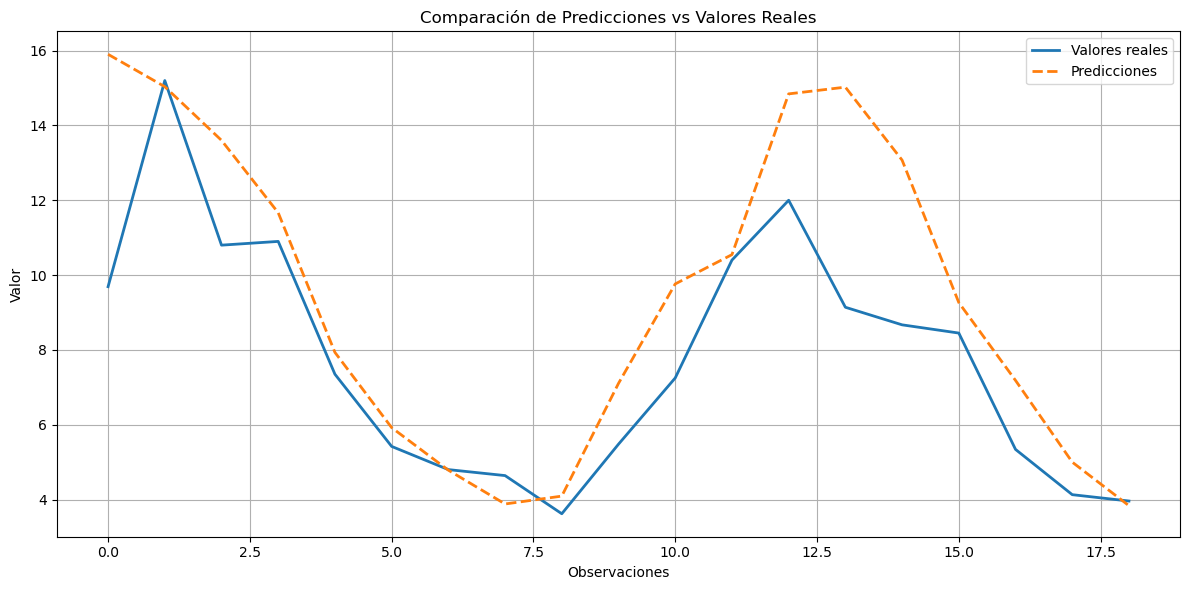

In [25]:
rf.graficar_predicciones()
rf.guardar_en_png('predicciones_rf')

'No se ha generado ningún gráfico'

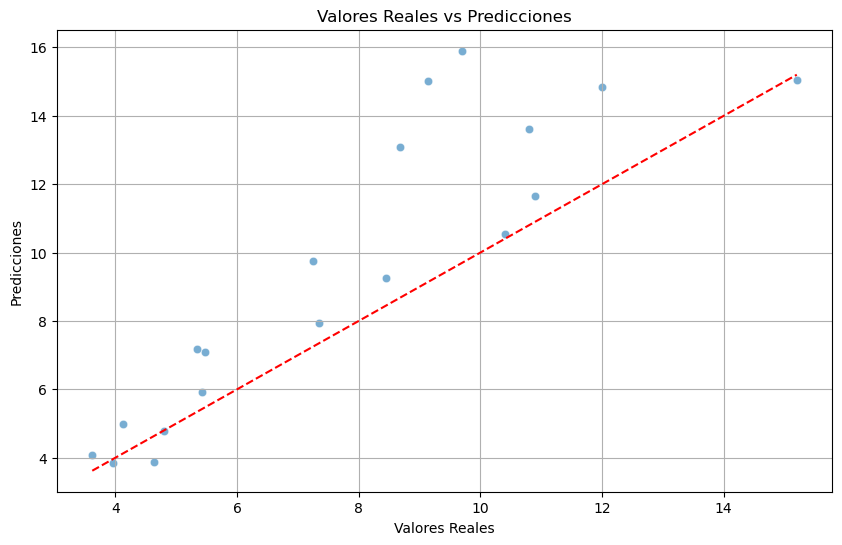

In [26]:
rf.visualizar_resultados()
rf.guardar_en_png('relacion_rf')

                feature  importancia
27  precipitacion_lag_1     0.117448
8          caudal_lag_1     0.092688
3                viento     0.067741
2         precipitacion     0.064155
32  precipitacion_lag_6     0.061141
31  precipitacion_lag_5     0.060119
28  precipitacion_lag_2     0.052847
12         caudal_lag_5     0.050690
1           temperatura     0.044874
7                   mes     0.042304
13         caudal_lag_6     0.039402
4                  niño     0.034063
21    temperatura_lag_1     0.027180
9          caudal_lag_2     0.018856
29  precipitacion_lag_3     0.018477
25    temperatura_lag_5     0.017624
15           niño_lag_1     0.015425
26    temperatura_lag_6     0.014831
14        caudal_lag_12     0.014816
23    temperatura_lag_3     0.013762
16           niño_lag_2     0.012841
17           niño_lag_3     0.012681
11         caudal_lag_4     0.012539
30  precipitacion_lag_4     0.012427
24    temperatura_lag_4     0.012354
22    temperatura_lag_2     0.011434
5

C:\Users\andre\OneDrive\Escritorio\UCR-TEC\2025\Primer Semestre 2025\Herramientas de Ciencia de Datos II\Proyecto Individual\ModeloRandomForest.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importancia', y='feature', data=df_impor.head(top_n), palette='viridis', ax=ax)


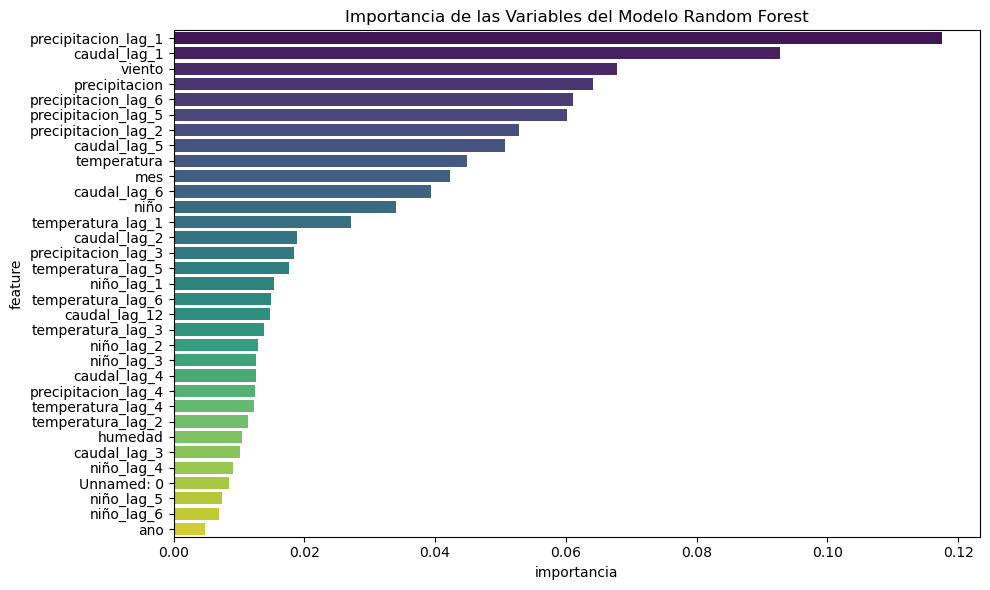

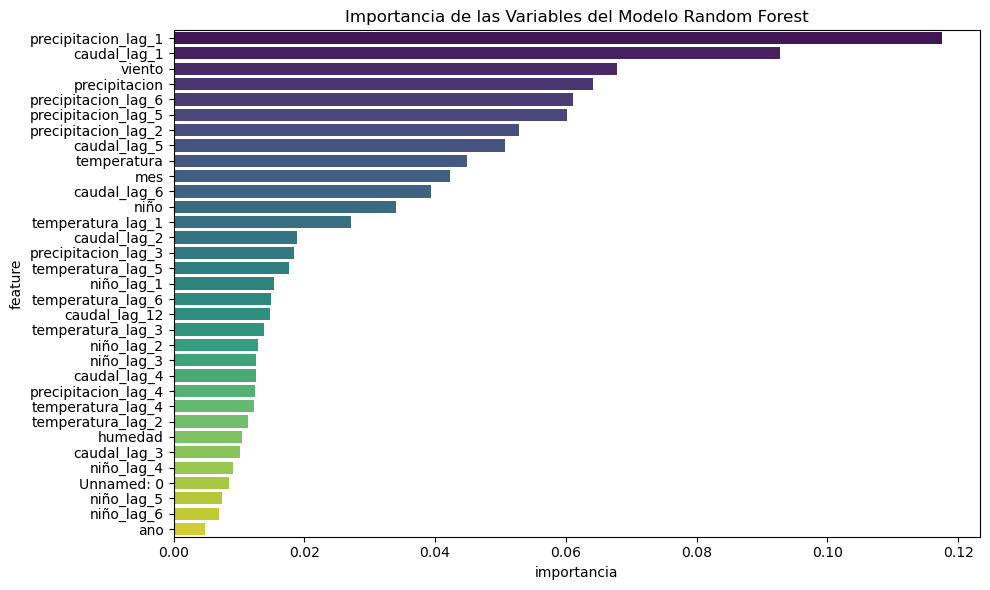

In [27]:
rf.importancia_feature(40)

                feature  media_importancia  sd_importancia
5               humedad           0.028694        0.014707
10         caudal_lag_3           0.021694        0.005974
30  precipitacion_lag_4           0.018593        0.013880
18           niño_lag_4           0.014592        0.007009
22    temperatura_lag_2           0.010796        0.019739
19           niño_lag_5           0.010702        0.003981
26    temperatura_lag_6           0.008950        0.007009
17           niño_lag_3           0.006764        0.009106
20           niño_lag_6           0.004553        0.008413
3                viento           0.002749        0.010362
0            Unnamed: 0           0.000000        0.000000
6                   ano           0.000000        0.000000
14        caudal_lag_12          -0.000035        0.007844
16           niño_lag_2          -0.000818        0.008648
9          caudal_lag_2          -0.001224        0.010706
29  precipitacion_lag_3          -0.002362        0.0135

C:\Users\andre\OneDrive\Escritorio\UCR-TEC\2025\Primer Semestre 2025\Herramientas de Ciencia de Datos II\Proyecto Individual\ModeloRandomForest.py:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sd_importancia', y='feature', data=df_permu.head(top_n).sort_values(by='media_importancia'), palette='viridis', ax=ax2)


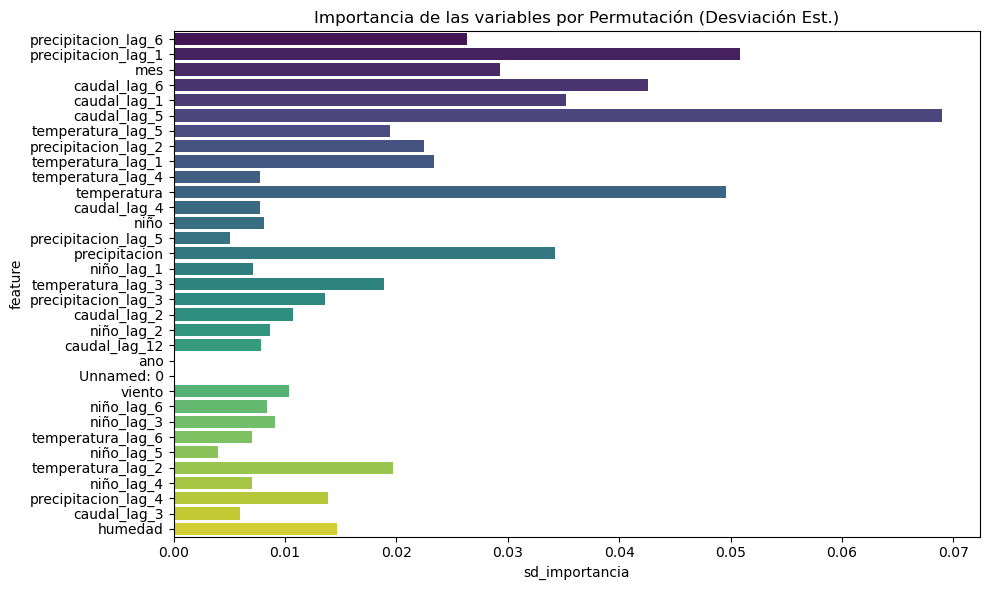

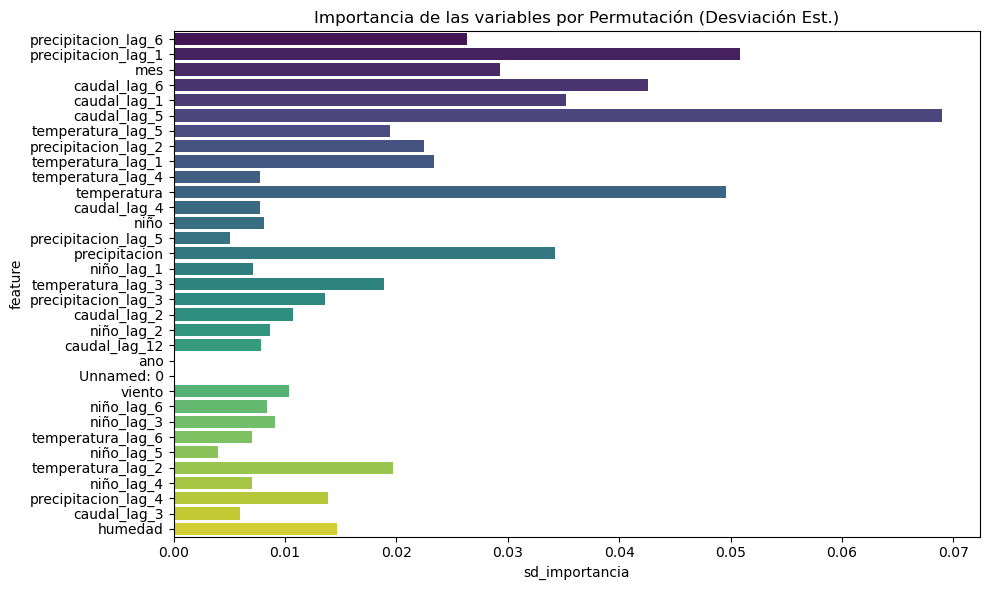

In [28]:
rf.importancia_permutacion('sd', 40)

## MODELO REDES NEURONALES

In [2]:
from RedesNeuronales import RedesNeuronales as RN

In [3]:
rn = RN('base_para_modelo_guardia_rf.xlsx')

In [20]:
rn.preprocesar_datos('caudal','caudal')

(array([[-1.71428571,  0.55287933,  0.2259202 , ...,  0.24394282,
          0.2316525 ,  0.21886852],
        [-1.67857143,  0.07597213,  0.24437338, ...,  0.24394282,
          0.2316525 ,  0.21886852],
        [-1.64285714, -0.24952001,  1.25688708, ...,  0.24394282,
          0.2316525 ,  0.21886852],
        ...,
        [ 1.64285714,  0.58943273,  0.71569566, ..., -1.04101035,
         -1.06003288, -0.56281264],
        [ 1.67857143,  0.40063235,  0.45616163, ..., -1.12952765,
         -1.06079549, -1.08147976],
        [ 1.71428571, -0.04114664,  0.67905139, ..., -1.07852204,
         -1.14982909, -1.08224748]]),
 array([[ 1.75      , -0.11953737,  1.20129162,  0.97554609,  0.34102806,
          0.46188223,  1.63139719,  0.74126798, -0.12634531, -0.18830961,
         -0.74846176, -1.10562268, -1.11941232, -0.94952137, -0.3319304 ,
          0.76327231,  1.34081923,  1.58742175,  1.56198942,  1.37316904,
          0.60613791, -0.04719761,  0.39204378,  0.58091292,  0.43082703,
   

In [60]:
arquitectura = [(64,'tanh'),(24,'tanh'),(24,'tanh'),(1,'linear')]
rn.crear_modelo(arquitectura)

C:\Users\andre\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential_4, built=True>

In [62]:
rn.entrenar(epochs = 300)

Entrenando el modelo...


Modelo entrenado!


'Gráfico guardado como perdidas_rn.png'

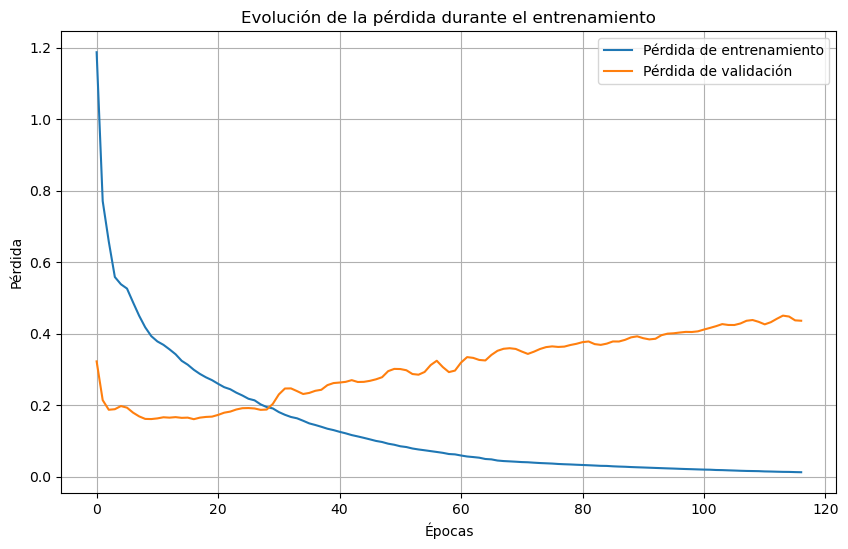

In [63]:
rn.graficar_perdidas()
rn.guardar_en_png('perdidas_rn')

In [64]:
rn.predecir()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([15.597698 , 14.860587 , 10.791864 ,  9.249402 , 12.120775 ,
        9.201268 ,  6.7886906,  3.87117  ,  5.8865013, 11.023134 ,
       12.291066 , 13.030204 , 15.134663 , 14.871423 ,  9.366447 ,
        8.492206 ,  6.4689226,  4.861911 ,  5.500219 ], dtype=float32)

In [65]:
rn.evaluar_modelo()

R²: -0.0447
RMSE: 3.2027
MAE: 2.5106
NSE: -0.0447


{'R²': -0.04470073451265533,
 'RMSE': 3.2026565508460982,
 'MAE': 2.5106370996174063,
 'NSE': -0.04470073451265533}

'Gráfico guardado como predicciones_rn.png'

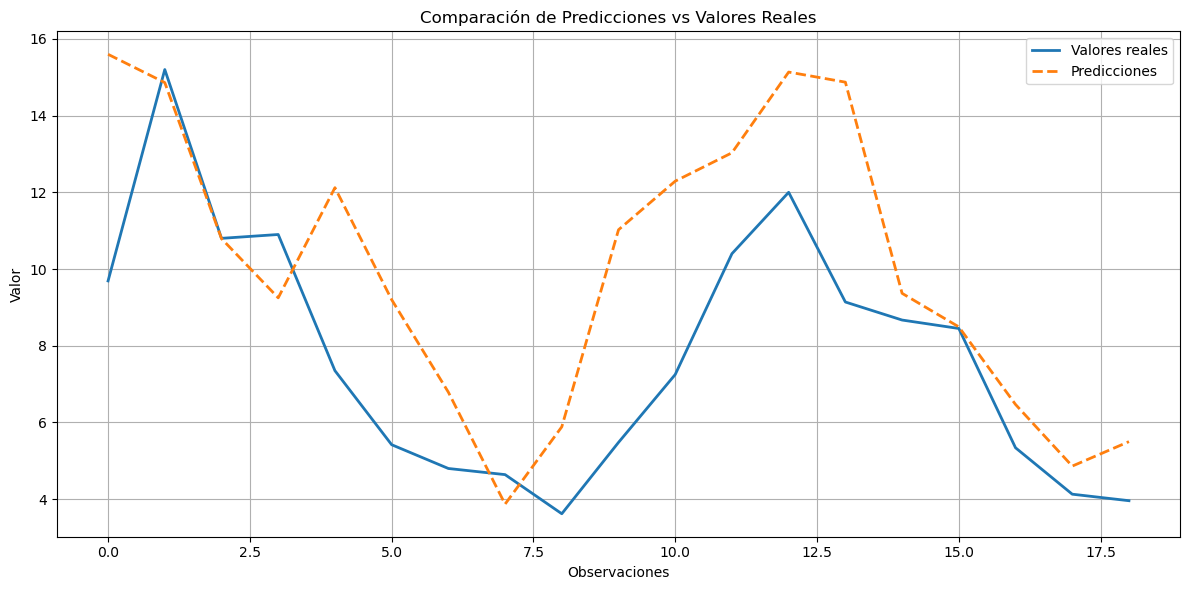

In [66]:
rn.graficar_resultados('ano')
rn.guardar_en_png('predicciones_rn')

PermutationExplainer explainer: 98it [00:18,  2.95it/s]                        
C:\Users\andre\OneDrive\Escritorio\UCR-TEC\2025\Primer Semestre 2025\Herramientas de Ciencia de Datos II\Proyecto Individual\RedesNeuronales.py:352: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, features = self.__x_train_escalado, feature_names = self.__variables_x)


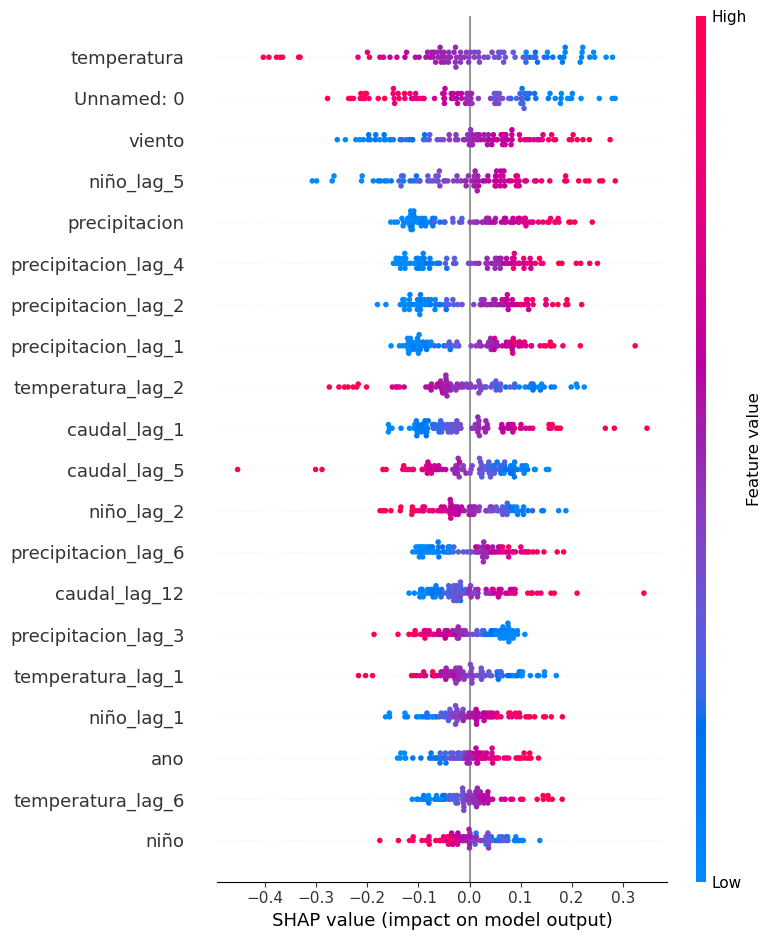

'Gráfico guardado como shap_rn.png'

In [29]:
rn.importancia_shap()
rn.guardar_en_png('shap_rn')

C:\Users\andre\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


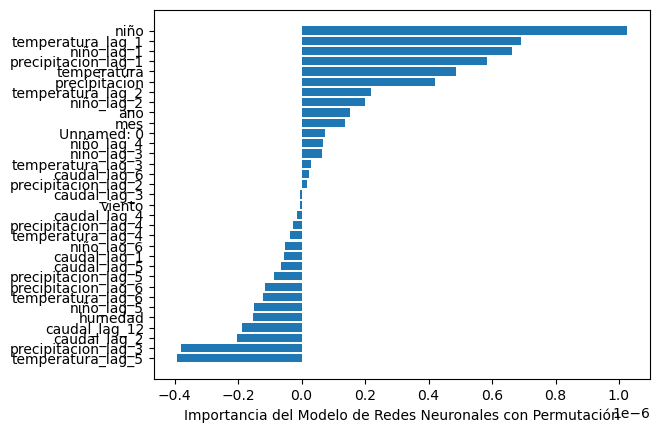

'Gráfico guardado como perm_rn.png'

In [12]:
rn.importancia_permu()
rn.guardar_en_png('perm_rn')

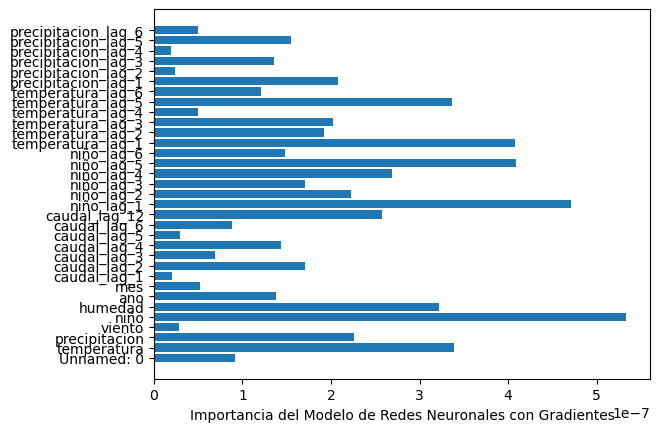

'Gráfico guardado como grad_rn.png'

In [13]:
rn.importancia_grad()
rn.guardar_en_png('grad_rn')